In [69]:
from h5py import File
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [47]:
def get_avalanche(T, times):
    size_list = []
    duration_list = []
    start_time_list = []
    end_time_list = []
    time_thr = 20*T/len(times)
    size = 1
    time_start = times[0]
    i = 0
    while i < len(times)-1:
        if times[i+1] - times[i] < time_thr:
            size += 1
        else:
            size_list.append(size)
            duration_list.append(times[i] - time_start)
            size = 1
            time_start = times[i+1]
            start_time_list.append(times[i+1])
            end_time_list.append(times[i])
        i += 1
    return start_time_list, end_time_list, size_list

In [4]:
with open("/root/code/paper_public/data/date_all.pkl","rb") as f:
    date_all = pickle.load(f)
with open("/root/code/paper_public/data/DIV_all.pkl","rb") as f:
    DIV_all = pickle.load(f)

20.0
[77, 126, 20, 96, 13, 316, 3, 99, 7]


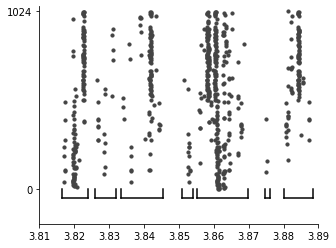

In [75]:
dish = "23312"
DIV_list = DIV_all[dish]
date_list = date_all[dish]

raster_time_start = 3.8 # [s]
raster_time_end = 3.9 # [s]
i_plot = 15
date = date_list[i_plot]
DIV = DIV_list[i_plot]
print(DIV)

path = f'/mnt/cerebellum/akita/development/data/{dish}/{date}/record.raw.h5'
record = File(path)
T = (record['data_store/data0000/stop_time'][0] - record['data_store/data0000/start_time'][0])/1000
N = 1024
times = np.array(pd.DataFrame(np.array(record['data_store/data0000/spikes']))['frameno']/20000)
times -= times[0]
channs = np.array(pd.DataFrame(np.array(record['data_store/data0000/spikes']))['channel'])

nspike_start = np.sum(times < raster_time_start)
nspike_end = np.sum(times < raster_time_end)

start_time_list, end_time_list, size_list = get_avalanche(raster_time_end-raster_time_start, times[nspike_start:nspike_end])


fig, ax = plt.subplots(figsize=(5,4))

ax.scatter(times[nspike_start:nspike_end],channs[nspike_start:nspike_end], c='#444444', s=10)
for i in range(len(start_time_list)-1):
    ax.plot([start_time_list[i]-0.0005,end_time_list[i+1]+0.001], [-50,-50],color='black')
    ax.plot([start_time_list[i]-0.0005,start_time_list[i]-0.0005], [0,-50],color='black')
    ax.plot([end_time_list[i+1]+0.001,end_time_list[i+1]+0.001], [0,-50],color='black')

ax.set_xlim([3.81,3.89])
ax.set_ylim([-200,1050])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0,1024])
print(size_list)
plt.savefig("/root/code/paper_public/figs/fig3A.eps")